In [1]:
import numpy as np

In [16]:
# Defining the Perceptron model
class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros((num_features, 1), dtype = float)
        self.bias = np.zeros(1, dtype = float)
    
    def predict(self, x):
        activation = np.dot(x, self.weights) + self.bias
        predictions = np.where(activation > 0., 1, 0)
        return predictions
    
    def evaluate(self, x, y):
        prediction = self.predict(x)
        if prediction == y:
            return 1
        else: 
            return 0
    
    def accuracy(self, x, y):
        predictions = self.predict(x).reshape(-1)
        acc = np.sum(predictions == y) / y.shape[0]
        return acc
    
    def calc_errors(self, x, y):
        y_hat = self.predict(x)
        errors = y - y_hat
        return errors
    
    def train(self, x, y, epochs, lr = 1):
        for e in range(epochs):
            for i in range(y.shape[0]):            
                error = self.calc_errors(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
                self.weights += (lr * error * x[i]).reshape(self.num_features, 1)
                self.bias += lr * error

In [98]:
# Load the dataset
data = np.genfromtxt('toy_data.txt', delimiter='\t')
X, y = data[:, :2], data[:, 2]
y = y.astype(int)

# Shuffling & train/test split
shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)
X, y = X[shuffle_idx], y[shuffle_idx]


training_percentage = 80
X_train, X_test = X[shuffle_idx[:training_percentage]], X[shuffle_idx[training_percentage:]]
y_train, y_test = y[shuffle_idx[:training_percentage]], y[shuffle_idx[training_percentage:]]

# Normalize (mean zero, unit variance)
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

In [93]:
print(X_train.mean(axis=0))
print(X_train.std(axis=0))

print(X.shape[0])
print(X_train.shape[0])
print(X_test.shape[0])

[-1.52655666e-17 -1.94289029e-17]
[1. 1.]
200
80
20


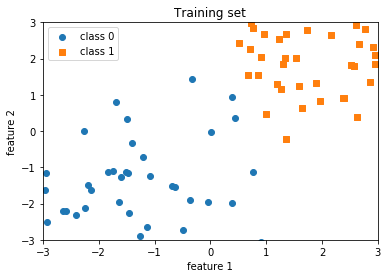

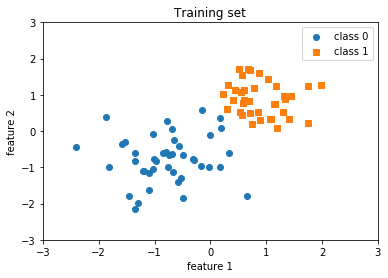

In [73]:
# plotting data
import matplotlib.pyplot as plt

plt.scatter(X[y==0, 0], X[y==0, 1], label='class 0', marker='o')
plt.scatter(X[y==1, 0], X[y==1, 1], label='class 1', marker='s')
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

In [74]:
pm = Perceptron(num_features=2)

pm.train(X_train, y_train, epochs=10)

print('Model parameters:\n\n')
print('Weights: %s\n' % pm.weights)
print('Bias: %s\n' % pm.bias)

Model parameters:


Weights: [[1.32209889]
 [1.29743022]]

Bias: [-1.]



In [75]:
train_acc = pm.accuracy(X_train, y_train)
print(train_acc*100)

100.0


In [76]:
test_acc = pm.accuracy(X_test, y_test)
print(test_acc*100)

90.0


In [21]:
# training the Perceptron model
all_weights = []
all_biases = []

my_perceptron = Perceptron(num_features=2)

acc = 0

for epoch in range(10):

    for i in range(X.shape[0]):
        
        all_weights.append(my_perceptron.weights.copy())
        all_biases.append(my_perceptron.bias.copy())
        my_perceptron.train(X[i].reshape(1, -1), y[i].reshape(-1), epochs=1)
        
        acc = my_perceptron.accuracy(X, y)
        
        if acc == 1.0:
            break
            
    if acc == 1.0:
        all_weights.append(my_perceptron.weights.copy())
        all_biases.append(my_perceptron.bias.copy())
        break

In [22]:
acc

1.0

In [ ]:
# Lets check how the weights were updated
import imageio


scatter_highlight_defaults = {'c': '',
                              'edgecolor': 'k',
                              'alpha': 1.0,
                              'linewidths': 2,
                              'marker': 'o',
                              's': 150}

def plot(i):
    
    fig, ax = plt.subplots()
    w, b = all_weights[i], all_biases[i]
    
    x_min = -20
    y_min = ( (-(w[0] * x_min) - b[0]) 
              / w[1] )

    x_max = 20
    y_max = ( (-(w[0] * x_max) - b[0]) 
              / w[1] )
    
    ax.set_xlim([-5., 5])
    ax.set_ylim([-5., 5])
    
    ax.set_xlabel('Iteration %d' % i)

    ax.plot([x_min, x_max], [y_min, y_max], color='k')
    
    ax.scatter(X[y==0, 0], X[y==0, 1], label='class 0', marker='o')
    ax.scatter(X[y==1, 0], X[y==1, 1], label='class 1', marker='s')
    
    ax.scatter(X[i][0], X[i][1], **scatter_highlight_defaults)

    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image


kwargs_write = {'fps':5.0, 'quantizer':'nq'}
imageio.mimsave('training.gif', [plot(i) for i in range(len(all_weights))], fps=1)

In [35]:
# Load the dataset
data_diabetes = np.genfromtxt('diabetes.csv', delimiter=',')
X = data_diabetes[:, :8] 
y = data_diabetes[:, 8]
y = y.astype(int)

# Shuffling & train/test split
shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)
X, y = X[shuffle_idx], y[shuffle_idx]

In [37]:
all_weights = []
all_biases = []

my_perceptron = Perceptron(num_features=8)

acc = 0

for epoch in range(10):

    for i in range(X.shape[0]):
        
        all_weights.append(my_perceptron.weights.copy())
        all_biases.append(my_perceptron.bias.copy())
        my_perceptron.train(X[i].reshape(1, -1), y[i].reshape(-1), epochs=1)
        
        acc = my_perceptron.accuracy(X, y)
        
        if acc == 1.0:
            break
            
    if acc == 1.0:
        all_weights.append(my_perceptron.weights.copy())
        all_biases.append(my_perceptron.bias.copy())
        break

In [38]:
# lets check how does the model perform
acc

0.6501950585175552